**DOCUMENT INFORMATION**
This .ipynb was used to generate the code to run the 2x4 NEQR + Grover's algorithm. Took inspiration from the following paper and the following tutorial (some of the code was borrowed from the tutorial):

https://github.com/Qiskit/textbook/blob/main/notebooks/ch-applications/image-processing-frqi-neqr.ipynb

https://arxiv.org/abs/2107.03039

In [ ]:
!pip install qiskit==0.46.1
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.0 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=85229c80d1dba361ecd81c029758f63c775018ef5136567121e49104834b22d7
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


Building on top of 2x2 image to take in a 2x4 image instead (1 added qubit). Code structure is copied over and then modified. Same logic as before, just need to add another qubit.

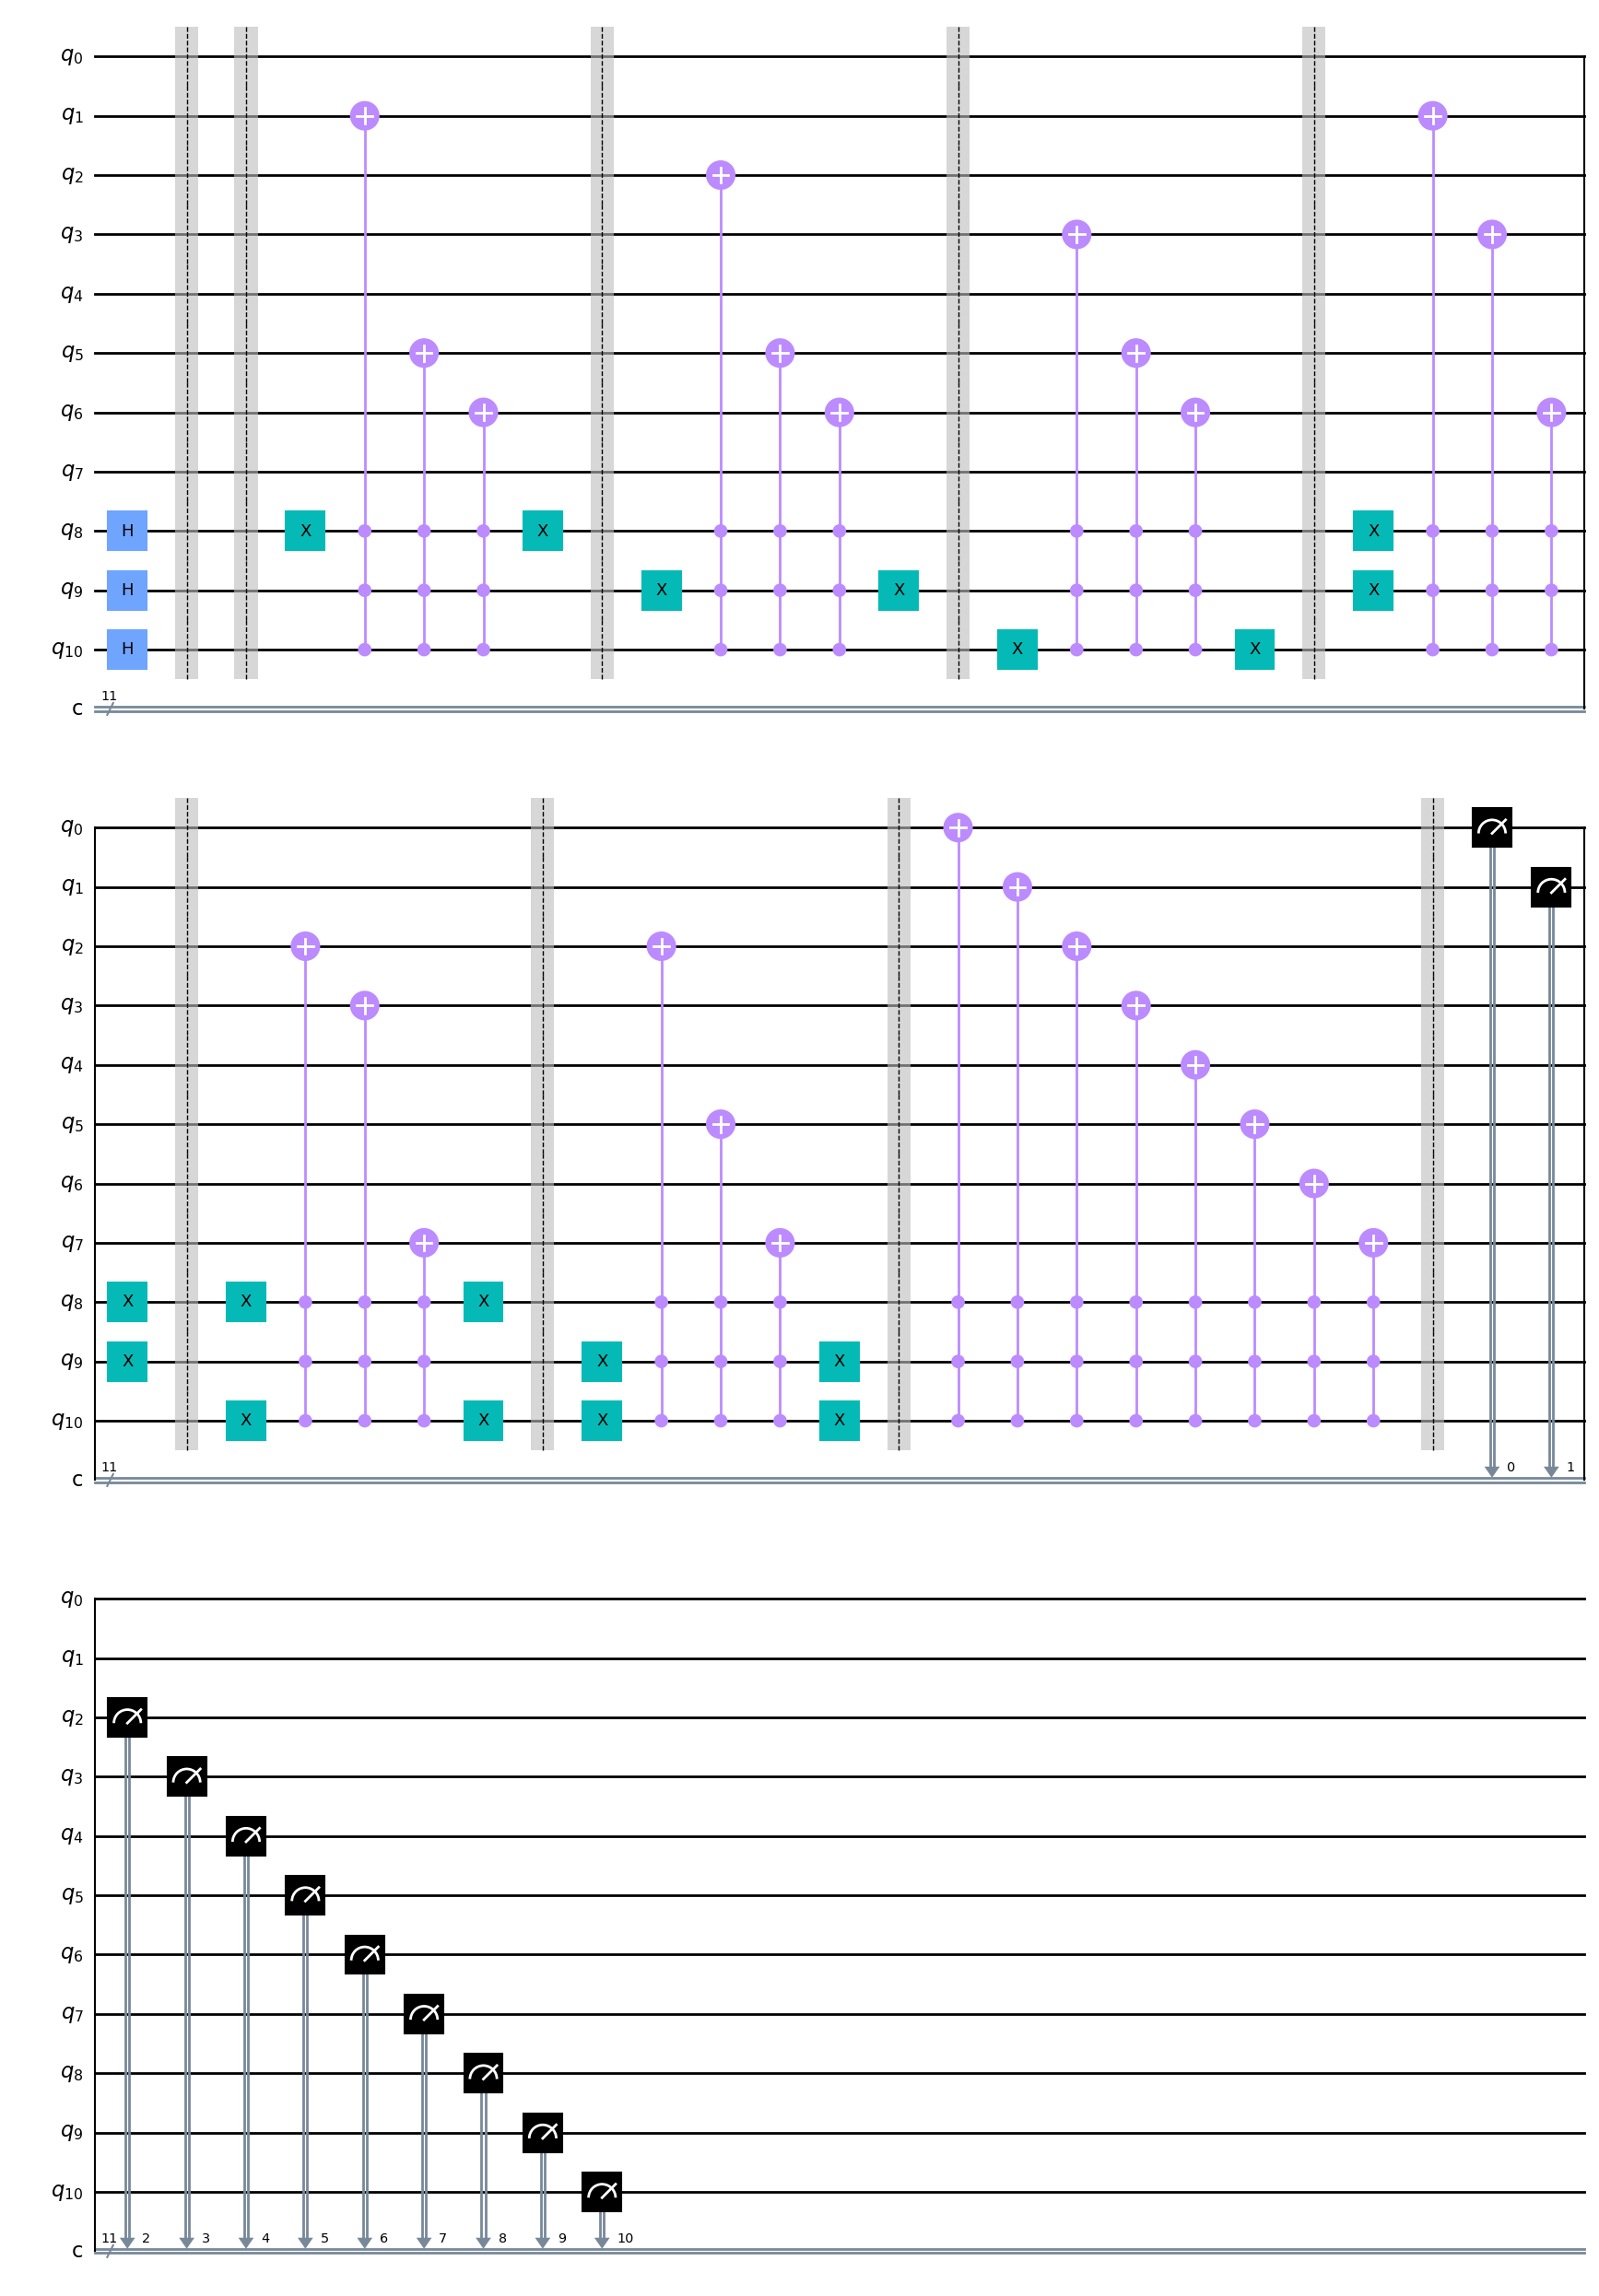

In [ ]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram

# Define the quantum circuit with 11 qubits (8 for intensity and 3 for index) and 11 classical bits for measurement
qc = QuantumCircuit(11, 11)

# Apply Hadamard gates to qubits 8, 9, and 10 (index qubits) to put them in superposition
qc.h(8)
qc.h(9)
qc.h(10)

qc.barrier()

# Initialize first state (zeros)

qc.barrier()

# Initialize second state

qc.x(8)

qc.mcx([8, 9, 10], 1)
qc.mcx([8, 9, 10], 5)
qc.mcx([8, 9, 10], 6)

qc.x(8)

qc.barrier()

# Initialize third state

qc.x(9)

qc.mcx([8, 9, 10], 2)
qc.mcx([8, 9, 10], 5)
qc.mcx([8, 9, 10], 6)

qc.x(9)

qc.barrier()

# Initialize fourth state

qc.x(10)

qc.mcx([8, 9, 10], 3)
qc.mcx([8, 9, 10], 5)
qc.mcx([8, 9, 10], 6)

qc.x(10)

qc.barrier()

# Initialize fifth state

qc.x(8)
qc.x(9)

qc.mcx([8, 9, 10], 1)
qc.mcx([8, 9, 10], 3)
qc.mcx([8, 9, 10], 6)

qc.x(8)
qc.x(9)

qc.barrier()

# Initialize sixth state

qc.x(8)
qc.x(10)

qc.mcx([8, 9, 10], 2)
qc.mcx([8, 9, 10], 3)
qc.mcx([8, 9, 10], 7)


qc.x(8)
qc.x(10)

qc.barrier()

# Initialize seventh state

qc.x(9)
qc.x(10)

qc.mcx([8, 9, 10], 2)
qc.mcx([8, 9, 10], 5)
qc.mcx([8, 9, 10], 7)

qc.x(9)
qc.x(10)

qc.barrier()

# Initialize eigth state

qc.mcx([8, 9, 10], 0)
qc.mcx([8, 9, 10], 1)
qc.mcx([8, 9, 10], 2)
qc.mcx([8, 9, 10], 3)
qc.mcx([8, 9, 10], 4)
qc.mcx([8, 9, 10], 5)
qc.mcx([8, 9, 10], 6)
qc.mcx([8, 9, 10], 7)

qc.barrier()

# Measurement Operations
for i in range(11):
    qc.measure(i, i)

# Draw the circuit
qc.draw(output="mpl")

# # Execute the circuit on the qasm simulator
# simulator = Aer.get_backend('qasm_simulator')
# compiled_circuit = transpile(qc, simulator)
# job = execute(compiled_circuit, simulator, shots=1024)
# result = job.result()

# # Get the counts and plot the histogram
# counts = result.get_counts(qc)
# print("Measurement Results:", counts)
# plot_histogram(counts)


Code to verify that we achieve the desired 8 qubit states.

In [ ]:
import matplotlib.pyplot as plt

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, backend)
job = backend.run(compiled_circuit)
result = job.result()

# Get the measurement results
counts = result.get_counts(qc)
print("Measurement Results:", counts)

Measurement Results: {'10001001010': 125, '00110100100': 127, '11111111111': 132, '01101101000': 131, '11001100010': 121, '01010001100': 138, '10101100100': 124, '00000000000': 126}


Code to run the initial circuit with grovers algorithm to amplitude the state that contains the black pixel.

In [ ]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Define the initial circuit as provided
def initial_circuit():
    # Define the quantum circuit with 11 qubits (8 for intensity and 3 for index) and 11 classical bits for measurement
    qc = QuantumCircuit(11, 11)

    # Apply Hadamard gates to qubits 8, 9, and 10 (index qubits) to put them in superposition
    qc.h(8)
    qc.h(9)
    qc.h(10)

    qc.barrier()

    # Initialize first state (zeros)

    qc.barrier()

    # Initialize second state

    qc.x(8)

    qc.mcx([8, 9, 10], 1)
    qc.mcx([8, 9, 10], 5)
    qc.mcx([8, 9, 10], 6)

    qc.x(8)

    qc.barrier()

    # Initialize third state

    qc.x(9)

    qc.mcx([8, 9, 10], 2)
    qc.mcx([8, 9, 10], 5)
    qc.mcx([8, 9, 10], 6)

    qc.x(9)

    qc.barrier()

    # Initialize fourth state

    qc.x(10)

    qc.mcx([8, 9, 10], 3)
    qc.mcx([8, 9, 10], 5)
    qc.mcx([8, 9, 10], 6)

    qc.x(10)

    qc.barrier()

    # Initialize fifth state

    qc.x(8)
    qc.x(9)

    qc.mcx([8, 9, 10], 1)
    qc.mcx([8, 9, 10], 3)
    qc.mcx([8, 9, 10], 6)

    qc.x(8)
    qc.x(9)

    qc.barrier()

    # Initialize sixth state

    qc.x(8)
    qc.x(10)

    qc.mcx([8, 9, 10], 2)
    qc.mcx([8, 9, 10], 3)
    qc.mcx([8, 9, 10], 7)


    qc.x(8)
    qc.x(10)

    qc.barrier()

    # Initialize seventh state

    qc.x(9)
    qc.x(10)

    qc.mcx([8, 9, 10], 2)
    qc.mcx([8, 9, 10], 5)
    qc.mcx([8, 9, 10], 7)

    qc.x(9)
    qc.x(10)

    qc.barrier()

    # Initialize eigth state

    qc.mcx([8, 9, 10], 0)
    qc.mcx([8, 9, 10], 1)
    qc.mcx([8, 9, 10], 2)
    qc.mcx([8, 9, 10], 3)
    qc.mcx([8, 9, 10], 4)
    qc.mcx([8, 9, 10], 5)
    qc.mcx([8, 9, 10], 6)
    qc.mcx([8, 9, 10], 7)

    qc.barrier()

    return qc

# Define the oracle that flips the phase of the 00000000 state since we are searching for 00000000 in the first 8 qubits
def oracle(qc):
    qc.x(range(8))  # Flip all intensity qubits
    qc.h(7)
    qc.mct(list(range(7)), 7)  # multi-controlled Toffoli gate acting on the last qubit
    qc.h(7)
    qc.x(range(8))  # Flip the qubits back


# Grover diffusion/reflector operator
def diffusion_operator(qc):
    # Apply H gates to all qubits to transform from |s> to |0>
    qc.h(range(8))

    # Performs reflection about s in the form of 2 |s><s| - 11
    qc.x(range(8))
    qc.h(7)
    qc.mct(list(range(7)), 7)
    qc.h(7)
    qc.x(range(8))

    # Apply transformation back from |0> to |s>
    qc.h(range(8))

# Initialize the main circuit
grover_circuit = initial_circuit()

# Apply Hadamard gates to the first 8 qubits
grover_circuit.h(range(8))

# Number of iterations
iterations = int(np.floor(np.pi / 4 * np.sqrt(2**8)))

# Apply Grover iterations
for _ in range(iterations):
    oracle(grover_circuit)
    diffusion_operator(grover_circuit)

# Measure the first 8 qubits
grover_circuit.measure(range(11), range(11))

# Execute the circuit
backend = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(grover_circuit, backend)
result = execute(compiled_circuit, backend, shots=1024).result()
counts = result.get_counts()

# Plot the result
print("Measurement Results:")
print(counts["00000000000"])
print(counts)

counts000 = counts["00000000000"]
counts010 = counts["01010001100"] if "01010001100" in counts else 0
counts100 = counts["10001001010"] if "10001001010" in counts else 0
counts111 = counts["11111111111"] if "11111111111" in counts else 0
counts011 = counts["01101101000"] if "01101101000" in counts else 0
counts110 = counts["11001100010"] if "11001100010" in counts else 0
counts001 = counts["00110100100"] if "00110100100" in counts else 0
counts101 = counts["10101100100"] if "10101100100" in counts else 0

<ipython-input-57-1a6862ac3765>:120: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(7)), 7)  # multi-controlled Toffoli gate acting on the last qubit
<ipython-input-57-1a6862ac3765>:133: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(7)), 7)
<ipython-input-57-1a6862ac3765>:160: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run

Measurement Results:
117
{'00111010010': 1, '01001110100': 1, '01100110011': 1, '01001110011': 2, '00100101110': 1, '11001001100': 1, '01110100011': 1, '01111010101': 1, '00110110111': 1, '01110100101': 1, '11010101000': 2, '10110001001': 2, '11010010110': 1, '01011000100': 2, '01110011011': 1, '10000010011': 1, '11101100110': 2, '11110100110': 1, '01010100011': 1, '11000001110': 2, '01000010010': 1, '11001011000': 1, '11101101111': 1, '10110101110': 1, '01000000100': 1, '11101000011': 1, '01001100101': 1, '10000001010': 1, '00101110000': 1, '01000010111': 1, '11011101000': 1, '10001011110': 1, '10001010001': 1, '10110111000': 1, '10000110001': 1, '10100101110': 1, '10101000011': 1, '00110101101': 1, '10101101101': 1, '11001000100': 1, '10010001110': 1, '00100011110': 1, '10101101111': 2, '11000100001': 2, '00101111100': 1, '11010111100': 1, '11001011101': 1, '11010000101': 2, '10111111000': 1, '11010001110': 1, '10011110100': 1, '01011010001': 1, '10110110010': 1, '01111011001': 2, '1

Plot the counts for the 8 qubit states that we initialized. We see that there are other states due to Grover's algorithm that we ignore for now (count is much smaller than our desired state anyways).

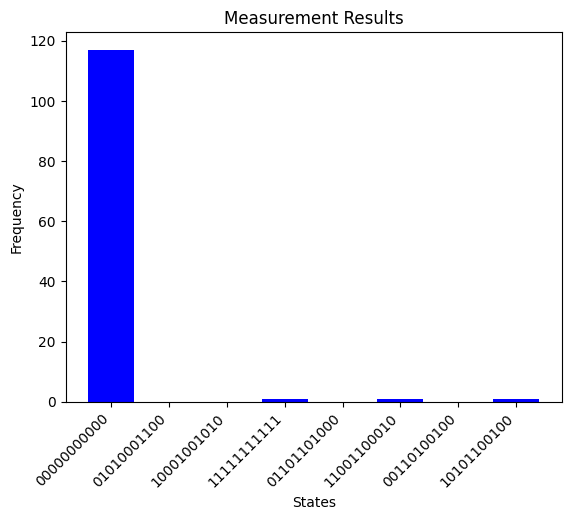

In [ ]:
data = [counts000, counts010, counts100, counts111, counts011, counts110, counts001, counts101]
labels = ["00000000000", "01010001100", "10001001010", "11111111111", "01101101000", "11001100010", "00110100100", "10101100100"]

# Plotting the histogram
plt.bar(labels, data, color='blue')
plt.xlabel('States')
plt.ylabel('Frequency')
plt.title('Measurement Results')
plt.xticks(rotation=45, ha='right')
plt.show()